<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Tutorial 3 - Wireshark, Spanning Tree, and Traceroute</h1>

<p>
Submission process:
</p>
<ul>
<li>Submission deadline is December 06, 16:00 CET (before the lecture) .</li>
<li>Commit and push your solution as single notebook file via git as <span style="font-family: monospace">./tutorial/tutorial3/tutorial3.ipynb</span>. Please take care of the correct subfolder/filename since submission is denied otherwise.</li>
<li>During the first lecture after the deadline we will discuss a sample solution in class.</li>
<li>Afterwards, you have time until December 13, 16:00 CET (before the lecture) to submit a corrected version of your submission:</li>
<ol>
  <li>Rework your solution according to our discussion in class.</li>
  <li>Commit and push the corrected version as single file via git as <span style="font-family: monospace">./tutorial/tutorial3/tutorial3.ipynb</span>. Please take care of the correct filename since submission is denied otherwise.</li>
</ol>
</ul>

<p>
Remarks:
</p>
<ul>
<li>Grading is done based on both versions of your submission.</li>
<li>If the first submission is missing your submission will not be graded.</li>
<li>If the second submission contains major flaws after revision not more than half of the credits for this tutorial can be achieved.</li>
<li>A sample solution is provided after December 13, 16:00 CET eventually.</li>
<li>
Please use <a href="mailto:acn@net.in.tum.de">acn@net.in.tum.de</a> for questions regarding lecture, tutorial, and project of ACN.
</li>
</ul>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 1 Wireshark (5 credits)</h3>

<p>
We consider the following hexdumps. It is known that these dumps represent Ethernet (IEEE 802.3u) frames including L2 headers but without FCS. In the following, we will dissect the whole frames.
</p>

<p>To print the hexdump we use the <span style="font-family: monospace">hexdump</span> Python module,
    which is not installed by default. Run the following cell to install it.
</p>
</div>

In [199]:
!pip3 install hexdump

In [200]:
import binascii
from hexdump import hexdump

def prtyprnt(dump):
    hexdump(dump)
    
# Here is an example how you can compare fields of a bytearray
# bytearray(b'\x01\x02\x03\x04')[2:4] == bytearray(b'\x03\x04')

dump_ipv4 = bytearray(b'\xfc\xe9\x98\x97\xec\xea\x44\xd9\xe7\x00\x40\x01\x08\x00\x45\x00\x00\x38\x00\x00\x00\x00\xf1\x01\x8c\x2b\x3e\x9a\x59\x2e\xac\x13\xf9\xbd\x0b\x00\xbf\x50\x00\x00\x00\x00\x45\x00\x00\x3c\x15\xb2\x00\x00\x01\x11\xea\x81\xac\x13\xf9\xbd\x81\xbb\x91\xf1\xd4\x0f\x82\xbe\x00\x28\xde\xb8')
dump_ipv6 = bytearray(b'\x33\x33\xff\xd7\x6d\xa0\x90\xe2\xba\x7a\xa7\x34\x86\xdd\x60\x00\x00\x00\x00\x20\x3a\xff\xfe\x80\x00\x00\x00\x00\x00\x00\x02\x25\x90\xff\xfe\x54\x73\x9a\xff\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff\xd7\x6d\xa0\x87\x00\x19\xc9\x00\x00\x00\x00\x20\x01\x4c\xa0\x20\x01\x00\x11\x02\x25\x90\xff\xfe\xd7\x6d\xa0\x01\x01\x00\x25\x90\x54\x73\x9a')



                    
print('IPv4 packet:')
prtyprnt(dump_ipv4)
print('\nIPv6 packet:')
prtyprnt(dump_ipv6)

IPv4 packet:
00000000: FC E9 98 97 EC EA 44 D9  E7 00 40 01 08 00 45 00  ......D...@...E.
00000010: 00 38 00 00 00 00 F1 01  8C 2B 3E 9A 59 2E AC 13  .8.......+>.Y...
00000020: F9 BD 0B 00 BF 50 00 00  00 00 45 00 00 3C 15 B2  .....P....E..<..
00000030: 00 00 01 11 EA 81 AC 13  F9 BD 81 BB 91 F1 D4 0F  ................
00000040: 82 BE 00 28 DE B8                                 ...(..

IPv6 packet:
00000000: 33 33 FF D7 6D A0 90 E2  BA 7A A7 34 86 DD 60 00  33..m....z.4..`.
00000010: 00 00 00 20 3A FF FE 80  00 00 00 00 00 00 02 25  ... :..........%
00000020: 90 FF FE 54 73 9A FF 02  00 00 00 00 00 00 00 00  ...Ts...........
00000030: 00 01 FF D7 6D A0 87 00  19 C9 00 00 00 00 20 01  ....m......... .
00000040: 4C A0 20 01 00 11 02 25  90 FF FE D7 6D A0 01 01  L. ....%....m...
00000050: 00 25 90 54 73 9A                                 .%.Ts.


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.5 credits]</b> Briefly explain which purpose the FCS serves and how it is computed.
</p>
</div>

The Frame Check Sequence (FCS) contains a 32-bit CRC value that is used to detect errors in the transmissions. It is computed as a function of the contents of the protected fields of the MAC frame, defined by a generating polynomial. [Source: IEEE Standard 802.3-2012, Section 3.2.9]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.1 credits]</b> Write the body of the given function <span style="font-family: monospace">extend_hexdump()</span>. 
The function gets a hexdump without the FCS as an input and should return the extended hexdump with the FCS at the correct position and with the correct length. 
<span style="font-family: monospace">extend_hexdump()</span> may not modify the original hexdump.
You do <b>not</b> need to calculate the correct FCS but can set all bits of the FCS to '1'.
</p>
</div>

In [201]:
def extend_hexdump(dump):
    # begin insert code
    dump = dump + bytearray(b'\xFF\xFF\xFF\xFF')
    # end insert code
    return dump
    
prtyprnt(extend_hexdump(dump_ipv4))

00000000: FC E9 98 97 EC EA 44 D9  E7 00 40 01 08 00 45 00  ......D...@...E.
00000010: 00 38 00 00 00 00 F1 01  8C 2B 3E 9A 59 2E AC 13  .8.......+>.Y...
00000020: F9 BD 0B 00 BF 50 00 00  00 00 45 00 00 3C 15 B2  .....P....E..<..
00000030: 00 00 01 11 EA 81 AC 13  F9 BD 81 BB 91 F1 D4 0F  ................
00000040: 82 BE 00 28 DE B8 FF FF  FF FF                    ...(......


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.2 credits]</b> 
Write two functions which return the source and destination MAC of a given Ethernet frame.
<ul>
    <li><span style="font-family: monospace">getSrcMAC()</span> shall return a <span style="font-family: monospace">bytearray</span> containing the source MAC address</li>
    <li><span style="font-family: monospace">getDstMAC()</span> shall return a <span style="font-family: monospace">bytearray</span> containing the destination MAC address</li>
</ul>
All functions get an Ethernet hexdump as input with the FCS excluded. 
The functions should work not only on the given hexdumps but on an arbitrary packet hexdump. 
</p>
</div>

In [202]:
def getSrcMAC(dump):
    # begin insert code
    return dump[6:12]
    # end insert code
    return dump

prtyprnt(getSrcMAC(dump_ipv6))

00000000: 90 E2 BA 7A A7 34                                 ...z.4


In [203]:
def getDstMAC(dump):
    # begin insert code
    return dump[0:6]
    # end insert code
    return dump

prtyprnt(getDstMAC(dump_ipv6))

00000000: 33 33 FF D7 6D A0                                 33..m.


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [0.5 credits]</b> 
Try to identify the hardware vendors, based on MAC addresses given in the IPv6 hexdump. 
</p>
</div>

Src. address: Intel
Dest. address: No vendor assignment (multicast address)

[Source: https://maclookup.app/]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.6 credits]</b>

Without knowing that the given hexdump is an Ethernet frame, we would not be able to decode it as we had no clue what the data fields represent.
Knowing that it is Ethernet enables us to parse the first header.
</p>
<ul>
    <li>
        Write a function that is able to check for a given hexdump whether the frame contains an IPv4 packet as its payload or not.
    </li>
    <li>
        Write a function that is able to check for a given hexdump whether the frame contains an IPv6 packet as its payload or not.
    </li>
    <li>
        Write a function that returns the type of the layer 3 payload. It should return 4/6 for IPv4/IPv6 and None otherwise.
    </li>
</ul>
</p>

<p>
<b>Note:</b> You can assume Ethernet frames without VLANs, i.e., no IEEE 802.3q.
</p>
</div>

In [204]:
def isIPv4(dump):
    # begin insert code
    return dump[12:14] == bytearray(b'\x08\x00')
    # end insert code
    return False

print('Does dump_ipv4 contain a valid IPv4 packet?', isIPv4(dump_ipv4))

Does dump_ipv4 contain a valid IPv4 packet? True


In [205]:
def isIPv6(dump):
    # begin insert code
    return dump[12:14] == bytearray(b'\x86\xdd')
    # end insert code
    return False

print('Does dump_ipv6 contain a valid IPv6 packet?', isIPv6(dump_ipv6))

Does dump_ipv6 contain a valid IPv6 packet? True


In [206]:
def getL3Type(dump):
    # begin insert code
    return dump[14] >> 4
    # end insert code
    return None

print('dump_ipv4 contains IP version {}'.format(getL3Type(dump_ipv4)))
print('dump_ipv6 contains IP version {}'.format(getL3Type(dump_ipv6)))

dump_ipv4 contains IP version 4
dump_ipv6 contains IP version 6


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>f) [0.5 credits]</b> 
How can the beginning of the payload be determined for Ethernet frames?
</p>
</div>

The ethernet header has a fixed size of 14 bytes. This means given an Ethernet frame, the payload will beginn at the 15th byte of the frame.

[Source: https://acn.net.in.tum.de/previous_exams/cheatsheet.pdf]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>g) [0.6 credits]</b> 
How can the beginning of the payload be determined for IP packets? What is the difference between IPv4 and IPv6?
</p>
</div>

In f), we already identified how to find the payload of the ethernet frame. In case the ethernet frame contains an IP packet, we can then go from there to identify the payload. The IPv4 header has a fixed size of 20 bytes, so in case no options are given, the payload starts after that. For IPv6, the header has a size of 40B. In case there are no extension headers, the payload starts from there. Otherwise we need to check the next header fields for each extension header until we reach the actual payload.

[Source: https://acn.net.in.tum.de/previous_exams/cheatsheet.pdf]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>h) [0.6 credits]</b>
Write three functions:
<ul>
    <li><span style="font-family: monospace">cutL2PDU()</span> shall return a <span style="font-family: monospace">bytearray</span> containing the Layer 2 PDU</li>
    <li><span style="font-family: monospace">cutL2SDU()</span> shall return a <span style="font-family: monospace">bytearray</span> containing the Layer 2 SDU</li>
    <li><span style="font-family: monospace">cutIPPDU()</span> shall return a <span style="font-family: monospace">bytearray</span> containing the Layer 3 PDU. <br><span style="font-family: monospace">cutIPPDU()</span> should only cut out valid IPv4 or IPv6 packets. In case no IPv4 or IPv6 packet is found an empty <span style="font-family: monospace">bytearray</span> should be returned.</li>
</ul>
<p>
All functions get an Ethernet hexdump as input with the FCS excluded. 
The functions should work not only on the given hexdump but on an arbitrary packet hexdump.
For this exercise you can assume correct packets, i.e. your functions do not need to validate the given data.
</p>
</div>

In [207]:
def cutL2PDU(dump):
    # begin insert code
    # end insert code
    return dump

prtyprnt(cutL2PDU(dump_ipv4))

00000000: FC E9 98 97 EC EA 44 D9  E7 00 40 01 08 00 45 00  ......D...@...E.
00000010: 00 38 00 00 00 00 F1 01  8C 2B 3E 9A 59 2E AC 13  .8.......+>.Y...
00000020: F9 BD 0B 00 BF 50 00 00  00 00 45 00 00 3C 15 B2  .....P....E..<..
00000030: 00 00 01 11 EA 81 AC 13  F9 BD 81 BB 91 F1 D4 0F  ................
00000040: 82 BE 00 28 DE B8                                 ...(..


In [208]:
def cutL2SDU(dump):
    # begin insert code
    return dump[14:]
    # end insert code
    return dump

prtyprnt(cutL2SDU(dump_ipv4))

00000000: 45 00 00 38 00 00 00 00  F1 01 8C 2B 3E 9A 59 2E  E..8.......+>.Y.
00000010: AC 13 F9 BD 0B 00 BF 50  00 00 00 00 45 00 00 3C  .......P....E..<
00000020: 15 B2 00 00 01 11 EA 81  AC 13 F9 BD 81 BB 91 F1  ................
00000030: D4 0F 82 BE 00 28 DE B8                           .....(..


In [209]:
def cutIPPDU(dump):
    # begin insert code
    if isIPv4(dump) or isIPv6(dump):
        return cutL2SDU(dump)
    else:
        return bytearray(b'')
    # end insert code
    return dump

prtyprnt(cutIPPDU(dump_ipv4))

00000000: 45 00 00 38 00 00 00 00  F1 01 8C 2B 3E 9A 59 2E  E..8.......+>.Y.
00000010: AC 13 F9 BD 0B 00 BF 50  00 00 00 00 45 00 00 3C  .......P....E..<
00000020: 15 B2 00 00 01 11 EA 81  AC 13 F9 BD 81 BB 91 F1  ................
00000030: D4 0F 82 BE 00 28 DE B8                           .....(..


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>i) [0.2 credits]<a name="wiresharkipv4payload"></a></b> 
Write a function which helps to identify the type of payload an IPv4 or IPv6 packet is carrying. You can assume that the <span style="font-family: monospace">identifyPayploadIP()</span> gets an Ethernet hexdump as input with the FCS excluded. It should return a <span style="font-family: monospace">bytearray</span> containing the L4 payload identifier or an empty <span style="font-family: monospace">bytearray</span> if neither an IPv4 nor an IPv6 payload was found.
</p>
<p>
    <b>Hint</b>: you can assume that there are no Extension Headers within the IPv6 packets.
    </p>
</div>

In [210]:
def identifyPayloadIP(dump):
    # begin insert code
    if isIPv4(dump):
        return cutIPPDU(dump)[9:10]
    elif isIPv6(dump):
        return cutIPPDU(dump)[6:7]
    else:
        return bytearray(b'')
    # end insert code
    return dump

prtyprnt(identifyPayloadIP(dump_ipv4))
prtyprnt(identifyPayloadIP(dump_ipv6))

00000000: 01                                                .
00000000: 3A                                                :


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>j) [0.2 credits]<a name="wiresharkl3payload"></a></b> 
Based on your answer of <a href="#wiresharkipv4payload">i)</a>, what are the protocols contained in the two given hexdumps.
</p>
</div>

IPv4: ICMPv4
IPv6: ICMPv6

[Source: https://acn.net.in.tum.de/previous_exams/cheatsheet.pdf]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>k) [0.5 credits]<a name="wiresharkl4headerfield"></a></b> 
Explain the payload (header fields and the content type) of the IPv4 packet identified in <a href="#wiresharkl3payload">j)</a>.
</p>
</div>

When looking at the content of the ICMPv4 packet, the following fields are set:
- Type: 0x0b (11): Time Exceeded
- Code: 0x00 (0): TTL expired in transit
- Checksum: 0xBF50
- Unused: 0x00000000

[Source: https://acn.net.in.tum.de/previous_exams/cheatsheet.pdf]

This means the ICMP packet is sent back to the client who just tried to send a packet which couldn't get transmitted as the TTL value expired. The ICMP packet will then contain the beginning of the packet that couldn't be transmitted as a payload.

[Source: RFC 792, Time Exceeded Message]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>l) [0.5 credits]<a name="wiresharkl4type"></a></b> 
Explain the payload (header fields and the content type) of the IPv6 packet identified in <a href="#wiresharkipv4payload">j)</a> and how this relates to the answer in <a href="#wiresharkipv4payload">d)</a>.
</p>
</div>

When looking at the content of the ICMPv6 packet, the following fields are set:
- Type: 0x87 (135): Neighbor Solicitation
- Code: 0x00 (0): Neighbor Discovery Protocol (NDP)
- Checksum: 0x19C9
- Reserved: 0x00000000
- Target Address: 2001:4ca0:2001:11:225:90ff:fed7:6da0
- Option Type: 0x01
- Option Length: 0x01
- Source Link Address: 00:25:90:54:73:9a

[Source: https://acn.net.in.tum.de/previous_exams/cheatsheet.pdf]

As we can see, this is a Neighbor Solicitation request, used to ask for the MAC address of the interface configured for a given IPv6 address. When looking at the answer in d), this makes sense as the destination MAC address did not contain a vendor but was a multicast address instead and Neighbor Solicitation sets the destination MAC address to multicast as it is currently unknown.

[Source: https://acn.net.in.tum.de/slides/06_IPv6.pdf, Slide 31]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 2 IPv6 (3.5 credits)</h3>

<p>
IPv6 is the successor if IPv4. Instead of 32 bits, 128 bits are used for each address. This offers enough space for many different address types. However, the text representation of the addresses becomes more complex as well.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [1 credits]</b>
    Write a function <span style="font-family: monospace">convert_ipv6</span>.
</p>
    
<p>
The function receives a bytearray containing a valid IPv6 address and should return the <b>shortest possible</b> string representation of the address. Make sure the following requirements are fulfilled.
</p>
<ul>
    <li>remove leading zeros for each byte-pair (do not remove trailing ones)</li>
    <li>the longest serie of consecutive 0s can be merged with ::</li>
</ul>
   
<p>
    <b>Remark:</b> For this problem you are not allowed to use any modules like
    <a href="https://docs.python.org/3/library/ipaddress.html#module-ipaddress">ipaddress</a>.
</p>
</div>

In [211]:
def convert_ipv6(address):
    # begin insert code
    import re

    result = []
    for i in range(0, len(address) // 2):
        current = address[2 * i:2 * (i + 1)]
        result.append(''.join(format(x, '02x') for x in current))
    result = ':'.join(result)

    # remove the longest series of 0s
    replace = [x for (x, _) in re.findall("(0000(:0000)+)", result)]
    replace.sort(key=len)

    if len(replace):
        result = result.replace(replace[0], "", 1)

    # remove leading 0s
    result = re.sub("(:0+)(\d)", r":\2", result, 8)

    return result
    # end insert code
    return str(address)



ipv6 = bytearray(b'\xff\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff\xd7\x6d\xa0')
# should convert to ff02::1:ffd7:6da0
convert_ipv6(ipv6)

'ff02::1:ffd7:6da0'

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
Stateless Address Auto Configuration (SLAAC) is a protocol to automatically set up Link-Local addresses.
    <a href="https://tools.ietf.org/html/rfc4291#section-2.5.6">RFC 4291</a> describes in Section 2.5.6 how Link-Local addresses are computed using the device's MAC address.
</p>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.5 credits]</b>
Write a function <span style="font-family: monospace">generate_link_local</span>.
</p>
<p>
    The functions receives a <span style="font-family: monospace">bytearray</span> containing a MAC address and should return a <span style="font-family: monospace">bytearray</span> with the corresponding Link-Local address.
</p>
<p>
    <b>Remark:</b> For this problem you are not allowed to use any modules like
    <a href="https://docs.python.org/3/library/ipaddress.html#module-ipaddress">ipaddress</a>.
</p>   
</div>

In [212]:
def generate_link_local(mac):
    # begin insert code
    mod = mac[:3] + bytearray(b'\xff\xfe') + mac[3:]
    # flip bit
    mod[0] ^= 1 << 1
    return bytearray(b'\xfe\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00') + mod
    # end insert code
    return bytearray(16)


mac = bytearray(b'\x01\x02\x03\x04\x05\x06')
convert_ipv6(generate_link_local(mac ))

'fe80::302:3ff:fe04:506'

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
IPv6 Multicast Address spaces are defined in <a href="https://tools.ietf.org/html/rfc4291#section-2.7">RFC 4291</a> in Section 2.7.
For Neigbor Discovery the Solicited-Node Address is used.
</p>
</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    <b>c) [0.5 credits]</b>
    Write two functions:
    <ul>
        <li> <span style="font-family: monospace">compute_solicited_node_multicast</span>, which gets as input a
            <span style="font-family: monospace">bytearray</span> containing an IPv6 address and
            returns a <span style="font-family: monospace">bytearray</span> containing the Solicited-Node Multicast             address of the IPv6 address.
        </li>
        <li>
            <span style="font-family: monospace">compute_multicast_mac</span>, which gets as input a
            <span style="font-family: monospace">bytearray</span> containing an IPv6 address and
            returns a <span style="font-family: monospace">bytearray</span> containing the multicast MAC address
            as specified in <a href="https://tools.ietf.org/html/rfc2464#section-7">RFC 2464</a> in Section 7.
        </li>
    </ul>

</p>
</div>

In [213]:
def compute_solicited_node_multicast(ipv6):
    # begin insert code
    return bytearray(b'\xff\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff') + ipv6[13:16]
    # end insert code
    return ipv6


def compute_multicast_mac(ipv6):
    # begin insert code
    return bytearray(b'\x33\x33') + ipv6[12:16]
    # end insert code
    return bytearray(6)


ipv6 = bytearray(b'\x20\x01\x4c\xa0\x20\x01\x00\x40\xe1\x14\x90\xfe\x38\x62\x55\x4f')
print(convert_ipv6(compute_solicited_node_multicast(ipv6)))

mac = compute_multicast_mac(ipv6)
print('{:02x}:{:02x}:{:02x}:{:02x}:{:02x}:{:02x}'.format(*mac))

ff02::1:ff62:554f
33:33:38:62:55:4f


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
In the next subproblem you will analyze how IPv6 addresses are distributed.
First you will download a file from the ACN website which contains two datasets with different IPv6 addresses.
</p>
<p>
Run the following cell to download the file and print some sample values from each dataset.
</p>
</div>

In [214]:
# Download IPv6 address lists from ACN website
!wget https://acn.net.in.tum.de/exercise/ipv6_dataset.npz
# Load file into Python
import numpy as np
data = np.load('ipv6_dataset.npz')

# Print sample data
print('Dataset 1:')
print('\n'.join(map(convert_ipv6, data['dataset1'][:3])))
    
print('\nDataset 2:')
print('\n'.join(map(convert_ipv6, data['dataset2'][:3])))

--2022-12-04 22:03:48--  https://acn.net.in.tum.de/exercise/ipv6_dataset.npz
Resolving acn.net.in.tum.de (acn.net.in.tum.de)... 188.95.232.11
Connecting to acn.net.in.tum.de (acn.net.in.tum.de)|188.95.232.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3200518 (3.1M) [application/octet-stream]
Saving to: ‘ipv6_dataset.npz’

ipv6_dataset.npz    100%[===================>]   3.05M  6.26MB/s    in 0.5s    

2022-12-04 22:03:49 (6.26 MB/s) - ‘ipv6_dataset.npz’ saved [3200518/3200518]

Dataset 1:
0218:9a9:88a7:dc4f:8502:6d2e:2b71:8830
5381:461b:8708:38bf:7dd2:a6e0:f7bb:dcb1
bc80:6b76:b7a3:4a37:b262:cfdf:c45a:8f5d

Dataset 2:
539f:d7a5:7ff3:8c3:10::1
2fca:c61c:e13b:6c85:200:8:100:1
50b7:761b:0c7e:c53c:21:0:1:41


<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    <b>d) [0.5 credits]</b>
Write a function <span style="font-family: monospace">count_ones</span>.
</p>
<p>
    The function receives a <span style="font-family: monospace">bytearray</span> containing an IPv6 address and should return the number of bits set to 1 in the last 64 bits of the IPv6 address.
</p>
</div>

In [215]:
def count_ones(ipv6):
    # begin insert code
    return sum([bin(x).count("1") for x in ipv6[8:]])
    # end insert code
    return 0

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    Once you finished the previous subproblem you can run the following cell which plots the distributions of bits set to one for each dataset.
</p>
</div>

/var/folders/zt/t8z6qqds2xl9pb72zkkz77p00000gn/T/ipykernel_80697/3419116326.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


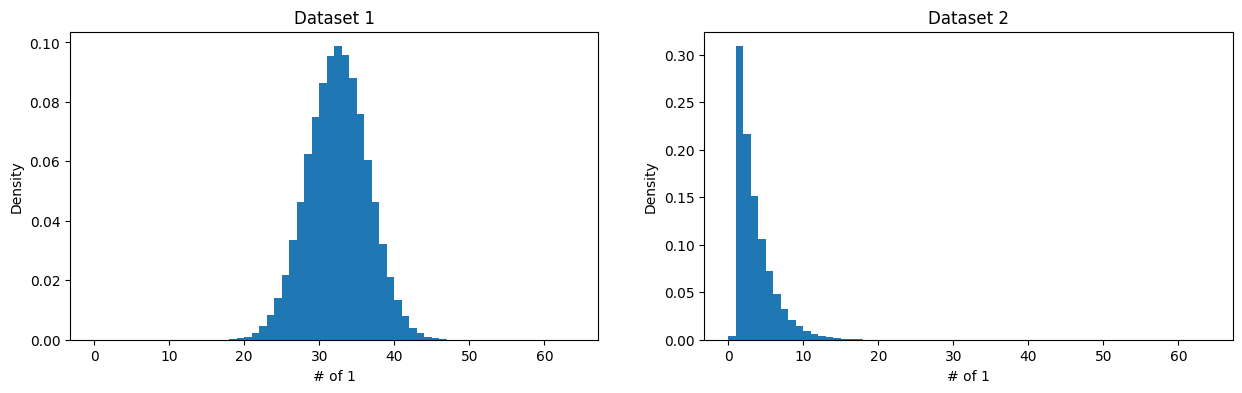

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(dataset1, dataset2):
    
    fig, axis = plt.subplots(1, 2, figsize=(15, 4))
    axis[0].hist(list(map(count_ones, dataset1)), bins=64, range=(0,64), density=True)
    axis[1].hist(list(map(count_ones, dataset2)), bins=64, range=(0,64), density=True)
    axis[0].set(xlabel='# of 1', ylabel='Density', title='Dataset 1')
    axis[1].set(xlabel='# of 1', ylabel='Density', title='Dataset 2')
    fig.show()
    
plot_histogram(data['dataset1'], data['dataset2'])

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
    <b>e) [1 credits]</b>
    Explain how the addresses in the two datasets differ. Give a reason for the differences and what kind of addresses are most likely contained in each dataset.
</p>
</div>

The first dataset contains addresses for which the number of bits set to 1 is distributed by a normal distribution. For the second dataset, the addresses almost contain no bits set to 1.

The reason for this difference is probably due to the fact, that the first dataset contains unicast addresses. Those types of addresses are used to identify a unique interface in a global network. They take up most of the address space and this means choosing random unicast addresses should lead to some kind of normal distribution.

THe second dataset probably contains link-local addresses, as most bits seem to be set to 0. Link-local addresses are part of the fe80::/10 subnet and in reality, even more bits are set to 0. This will lead to a low number of bits set to 1 in those types of addresses.

[Source: https://acn.net.in.tum.de/slides/06_IPv6.pdf, Slide 18]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 3 Spanning Tree Protocol (2.5 credits)</h3>

<p>
We consider the network topology shown in the following figure.
The bridge IDs of B1 to B5 correspond to their number, i. e., B1 has ID 1, B2 has ID 2, etc.
For the sake of simplicity, we assume equal costs for each bridge port.
The network segments are labeled by letters A to H.
</p>
    
<p>
    To visualize the graph we use the <span style="font-family: monospace">networkx</span> module,
    which probably needs to be installed.
</p>
</div>

In [217]:
!pip3 install networkx==2.6.3

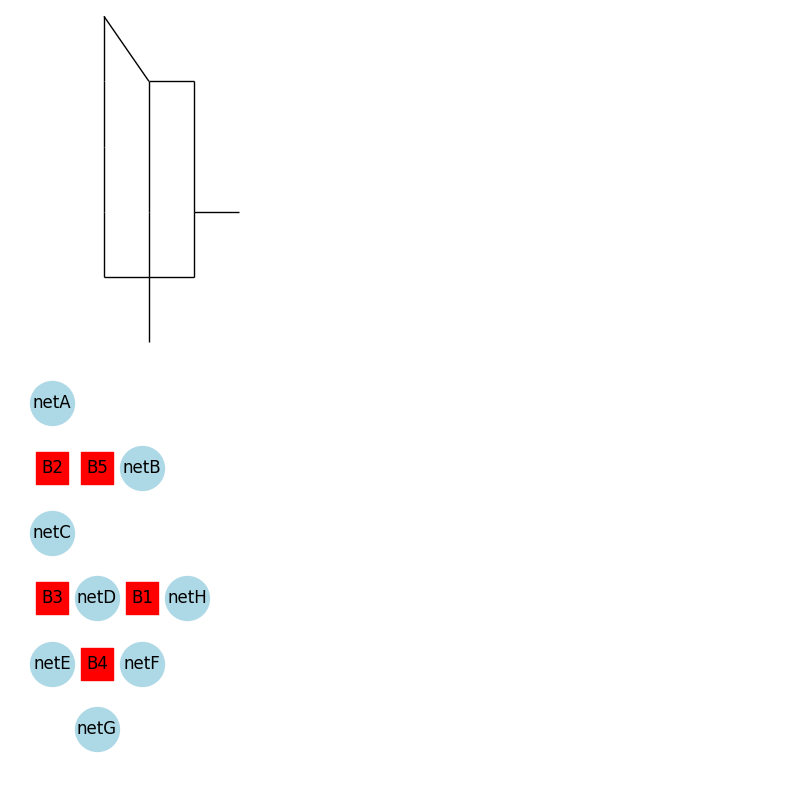

In [218]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt


edges = [
         # (src, dst, weight)
         ('netA', 'B2', 1),
         ('netA', 'B5', 1),
         ('netB', 'B5', 1),
         ('netB', 'B1', 1),
         ('netC', 'B2', 1),
         ('netC', 'B3', 1),
         ('netD', 'B5', 1),
         ('netD', 'B4', 1),
         ('netE', 'B3', 1),
         ('netE', 'B4', 1),
         ('netF', 'B1', 1),
         ('netF', 'B4', 1),
         ('netG', 'B4', 1),
         ('netH', 'B1', 1),
         
         ]


networks = {
    # 'name':(posX, posY)
    'netA':(0,0),
    'netB':(20,-20),
    'netC':(0,-40),
    'netD':(10,-60),
    'netE':(0,-80),
    'netF':(20,-80),
    'netG':(10,-100),
    'netH':(30,-60)
}
bridges = {
    # 'name':(posX, posY)
    'B1':(20,-60), 
    'B2':(0,-20),
    'B3':(0,-60),
    'B4':(10,-80),
    'B5':(10,-20)
}
ports = {
    # 'name':(posX, posY)
    'b1pa':(21.5,-60), 
    'b1pb':(20,-55), 
    'b1pc':(20,-65),
    'b2pa':(0,-15),
    'b2pb':(0,-25),
    'b3pa':(0,-55),
    'b3pb':(0,-65),
    'b4pa':(10,-75),
    'b4pb':(10,-85),
    'b4pc':(8.5,-80),
    'b4pd':(11.5,-80),
    'b5pa':(11.5,-20),
    'b5pb':(10,-25),
    'b5pc':(8.5,-17)
}

def plotNetwork(edges, networks, bridges, bp, dp, rp):
    # set plot size
    plt.figure(3,figsize=(10,10)) 

    # draw graph
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    nx.draw_networkx_edges(G, pos=dict(dict(networks, **bridges), **ports), nodelist = [], edgelist = edges)
    nx.draw_networkx_nodes(G, pos=networks, nodelist=networks.keys(), node_color = 'lightblue', node_size=1000)
    nx.draw_networkx_nodes(G, pos=bridges, nodelist=bridges.keys(), node_color = 'red', node_shape='s', node_size=500)
    nx.draw_networkx_nodes(G, pos=ports, nodelist=dp, node_color='blue', node_size=250)
    nx.draw_networkx_nodes(G, pos=ports, nodelist=rp, node_color='green', node_size=250)
    nx.draw_networkx_nodes(G, pos=ports, nodelist=bp, node_color='black', node_size=250)
    nx.draw_networkx_labels(G, pos=dict(dict(networks, **bridges), **ports))
    
    # remove axis and plot
    plt.axis('off')
    plt.show()
    
plotNetwork(edges, networks, bridges, {}, {}, {})

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.25 credits]</b>
What is the difference between a shortest path tree (SPT) and a minimum spanning tree (MST)?
</p>
</div>

As the name suggests, the shortest path tree is rooted at a certain node and spans the entire network in a way such that the path from the root to each node contained in the spanning tree is the shortest.

The minimum spanning tree spans the entire network in a way such that the weigths of all vertices together are minimal.

[Source: https://courses.cs.duke.edu/spring19/compsci330/lecture13scribe.pdf]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.25 credits]</b>
Explain the problem that is being solved by using the spanning tree protocol in a switched network.
</p>
</div>

The spanning tree protocol solves the problem of loops in the network. The bridges "gossip" among themselves in order to computer a subset of the network, which does not contain a loop but connects the network fully. Then, data is only forwarded on the spanning tree.

[Source: https://acn.net.in.tum.de/slides/03_Protocol_Mechanisms.pdf, Slide 46]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.5 credits]</b>
Explain the purpose of the root bridge and how it is elected.
</p>
</div>

The root bridge is the root of the network and the spanning tree protocol will determine the least cost path from all nodes to the root bridge and will disable all other paths ot the root. It is usually elected by its ID (the bridge with the lowest bridge_ID becomes the root bridge).

[Source: https://acn.net.in.tum.de/slides/03_Protocol_Mechanisms.pdf, Slide 47]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [1 credits]</b>
How does the resulting spanning tree look like after the spanning tree algorithm has been applied to the given network topology?
</p>
</div>

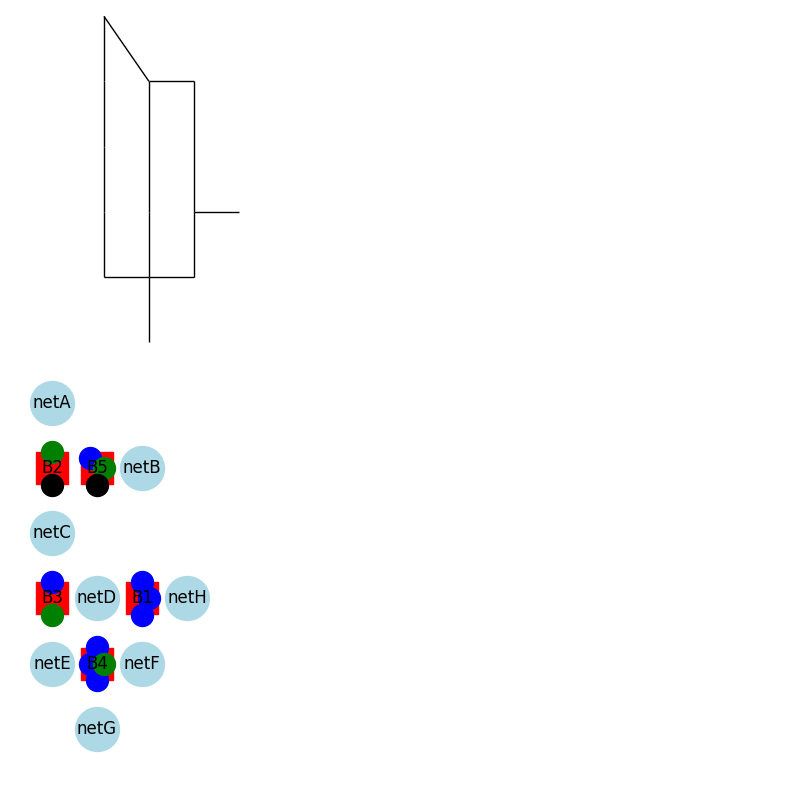

In [219]:
# fill these lists with the names of the blocked/designated/root ports
# use the names already predefined e.g., blocked = ['b1pa'] for blocking port a of bridge b1

# take care that each port only occurs once
# if a port is assigned multiple times your answer will not be accepted

blocked = [
    # begin insert code
    'b2pb',
    'b5pb'
    # end insert code
]
designated = [
    # begin insert code
    'b1pa',
    'b1pb',
    'b1pc',
    'b3pa',
    'b4pa',
    'b4pb',
    'b4pc',
    'b5pc'
    # end insert code
]
root = [
    # begin insert code
    'b2pa',
    'b3pb',
    'b4pd',
    'b5pa'
    # end insert code
]
plotNetwork(edges, networks, bridges, blocked, designated, root)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.5 credits]</b>
What happens if bridge B1 fails?
</p>
</div>

As bridge B1 is selected as the root bridge, the spanning tree will possibly fall apart and a new root bridge needs to be elected (B2). Then, the protocol again needs to compute the new spanning tree.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3>Problem 4 Network Topology and Tracing Routes (5 credits)</h3>

<p>
In this task, you will make yourself familiar with the tool traceroute, which can be used to get a glimpse at a network’s topology.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>a) [0.5 credits]</b>
Explain the basic principle behind traceroute, i.e., how does it work and what is it being used for?
</p>
</div>

Traceroute sends multiple ICMP packets with increasing TTL and tracks the "time exceeded" replies of the different entities on the path. This can be used to follow the path that a packet will take.

[Source: https://acn.net.in.tum.de/slides/05_IPv4.pdf, Slide 25]

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>b) [0.5 credits]</b>
Discuss the advantages and disadvantages when using packets with different protocols / payload types to generate the traces.
</p>
</div>

Advantages: Using different protocols/payload types will give a more comprehensive view of the network as those parameters might influence how the packet is routed.

Disadvantages: The traceroute might be more difficult to interpret as the packets might behave differently on the packet and also, the program has to handle different kinds of responses depending on which protocol was used.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
The following cell shows an output of traceroute to <a href="http://www.caida.org">caida.org</a>.
</p>
</div>

In [220]:
# traceroute to www.caida.org (2001:48d0:101:501::122), 30 hops max, 80 byte packets
# 1  * * 2a00:4700:0:9::1 (2a00:4700:0:9::1)  1.663 ms
# 2  2a00:4700:0:8::1 (2a00:4700:0:8::1)  1.512 ms  1.363 ms  1.107 ms
# 3  2a00:4700:0:1::3 (2a00:4700:0:1::3)  1.458 ms  1.263 ms  1.056 ms
# 4  * * *
# 5  cr-fra2-be14.x-win.dfn.de (2001:638:c:c071::1)  10.762 ms * *
# 6  dfn.mx1.fra.de.geant.net (2001:798:14:10aa::9)  10.881 ms  10.644 ms  10.492 ms
# 7  ae7.mx1.ams.nl.geant.net (2001:798:cc::19)  16.758 ms  16.595 ms  16.446 ms
# 8  internet2-gw.mx1.ams.nl.geant.net (2001:798:99:1::2a)  111.152 ms  111.005 ms *
# 9  fourhundredge-0-0-0-2.4079.core1.ashb.net.internet2.edu (2001:468:0:1::74)  166.537 ms  167.209 ms  166.795 ms
#10  fourhundredge-0-0-0-16.4079.core2.ashb.net.internet2.edu (2001:468:0:1::3)  167.301 ms fourhundredge-0-0-0-18.4079.core2.ashb.net.internet2.edu (2001:468:0:1::6b)  167.122 ms fourhundredge-0-0-0-17.4079.core2.ashb.net.internet2.edu (2001:468:0:1::9)  166.943 ms
#11  fourhundredge-0-0-0-1.4079.core2.clev.net.internet2.edu (2001:468:0:1::8b)  166.439 ms  166.259 ms fourhundredge-0-0-0-23.4079.core2.clev.net.internet2.edu (2001:468:0:1::193)  166.082 ms
#12  fourhundredge-0-0-0-2.4079.core2.eqch.net.internet2.edu (2001:468:0:1::111)  167.631 ms  167.452 ms  167.275 ms
#13  fourhundredge-0-0-0-17.4079.core1.eqch.net.internet2.edu (2001:468:0:1::40)  167.947 ms fourhundredge-0-0-0-2.4079.core2.chic.net.internet2.edu (2001:468:0:1::112)  166.519 ms fourhundredge-0-0-0-18.4079.core1.eqch.net.internet2.edu (2001:468:0:1::42)  167.564 ms
#14  fourhundredge-0-0-0-1.4079.core1.chic.net.internet2.edu (2001:468:0:1::ce)  166.520 ms  166.388 ms fourhundredge-0-0-0-22.4079.core1.chic.net.internet2.edu (2001:468:0:1::60)  167.456 ms
#15  fourhundredge-0-0-0-1.4079.core2.kans.net.internet2.edu (2001:468:0:1::11d)  167.196 ms  167.011 ms  166.830 ms
#16  fourhundredge-0-0-0-1.4079.core2.denv.net.internet2.edu (2001:468:0:1::fa)  167.063 ms  166.883 ms  166.705 ms
#17  fourhundredge-0-0-0-3.4079.core2.salt.net.internet2.edu (2001:468:0:1::a9)  167.973 ms  167.795 ms  167.617 ms
#18  fourhundredge-0-0-0-8.4079.core1.losa.net.internet2.edu (2001:468:0:1::72)  165.542 ms * *
#19  hpr-lax-agg10--i2.cenic.net (2607:f380:1::108:9a41:ac81)  164.806 ms  176.149 ms  175.724 ms
#20  * * *
#21  hpr-sdsc-100ge--sdg-hpr3.cenic.net (2607:f380:1::108:9a41:a2b1)  167.048 ms  166.858 ms  167.170 ms
#22  2001:48d0:101:501::122 (2001:48d0:101:501::122)  167.055 ms  166.921 ms  167.033 ms

# Use the following simplified output for plotting
traceroute_output = """
2a00:4700:0:9::1  * * 1.663 ms
2a00:4700:0:8::1  1.512 ms  1.363 ms  1.107 ms
2a00:4700:0:1::3  1.458 ms  1.263 ms  1.056 ms
* * *
2001:638:c:c071::1  10.762 ms * *
2001:798:14:10aa::9  10.881 ms  10.644 ms  10.492 ms
2001:798:cc::19  16.758 ms  16.595 ms  16.446 ms
2001:798:99:1::2a  111.152 ms  111.005 ms *
2001:468:0:1::74  166.537 ms  167.209 ms  166.795 ms
2001:468:0:1::3  167.301 ms 167.122 ms 166.943 ms
2001:468:0:1::8b  166.439 ms  166.259 ms 166.082 ms
2001:468:0:1::111  167.631 ms  167.452 ms  167.275 ms
2001:468:0:1::40  167.947 ms 166.519 ms 167.564 ms
2001:468:0:1::ce  166.520 ms  166.388 ms 167.456 ms
2001:468:0:1::11d  167.196 ms  167.011 ms  166.830 ms
2001:468:0:1::fa  167.063 ms  166.883 ms  166.705 ms
2001:468:0:1::a9  167.973 ms  167.795 ms  167.617 ms
2001:468:0:1::72  165.542 ms * *
2607:f380:1::108:9a41:ac81  164.806 ms  176.149 ms  175.724 ms
* * *
2607:f380:1::108:9a41:a2b1  167.048 ms  166.858 ms  167.170 ms
2001:48d0:101:501::122  167.055 ms  166.921 ms  167.033 ms
"""

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>c) [0.25 credits]</b>
What does the line * * * mean?
</p>
</div>

This means that the host located at the TTL did not reply with a TTL expired in transit packet or the packet got somehow lost in transit.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>d) [0.75 credits]</b>
Execute the traceroute command in the following cell from your VM.
Compare these results to the given trace and explain what you find.
</p>
</div>

In [221]:
!traceroute www.caida.org # just execute this cell to start a traceroute

traceroute to www.caida.org (192.172.226.122), 64 hops max, 52 byte packets
 1  fritz.box (192.168.178.1)  1.362 ms  1.191 ms  1.267 ms
 2  * * *
 3  88.79.10.240 (88.79.10.240)  7.533 ms  7.378 ms
    88.79.10.238 (88.79.10.238)  7.257 ms
 4  188.111.216.100 (188.111.216.100)  7.300 ms
    188.111.216.112 (188.111.216.112)  7.068 ms  6.911 ms
 5  92.79.200.240 (92.79.200.240)  7.854 ms
    92.79.215.18 (92.79.215.18)  8.038 ms
    92.79.200.240 (92.79.200.240)  7.451 ms
 6  145.254.2.181 (145.254.2.181)  6.659 ms
    145.254.2.175 (145.254.2.175)  7.716 ms  7.441 ms
 7  ae4-100-xcr1.mue.cw.net (195.2.5.13)  6.761 ms  6.689 ms  7.108 ms
 8  ae10.pcr1.fis.cw.net (195.2.18.182)  95.326 ms  94.347 ms  94.680 ms
 9  ae39-tcr1.pat.cw.net (195.2.16.230)  94.080 ms  94.504 ms  96.811 ms
10  et-7-1-0-xcr1.nyh.cw.net (195.2.24.241)  92.098 ms  92.819 ms *
11  ae30-xcr2.nyk.cw.net (195.2.16.134)  316.614 ms  94.318 ms  93.630 ms
12  * * *
13  ae2.3602.ear2.losangeles1.level3.net (4.69.207.45)  1

The trace executed on the VM is using IPv4 instead of IPv6. The route taken is also slightly different, requiring 23 steps instead of 22 and also, other hops go unanswered. For example, hops 9 - 18 return * * * while the rest of the hops answer with an TTL expired in transit package. Apart from that, the route roughly seems to take a similar path, first going over servers of the dfn, then over the netherlands of geant.net servers and then crossing over the servers of cenic.net in the us.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>e) [0.75 credits]</b>
Plot the average RTT deltas between consecutive hops from the given traceroute output, e.g., $\Delta RTT_{0\rightarrow1} = RTT_1 − RTT_0$.
</p>
<p>
<b>Hint:</b>
Use the given csv reader to extract the numbers from the traceroute output.
Graphs can be generated using the python library matplotlib. The differences in this subproblem can be nicely plotted with a <a href="https://pythonspot.com/en/matplotlib-bar-chart/">bar chart</a>.
</p>
</div>

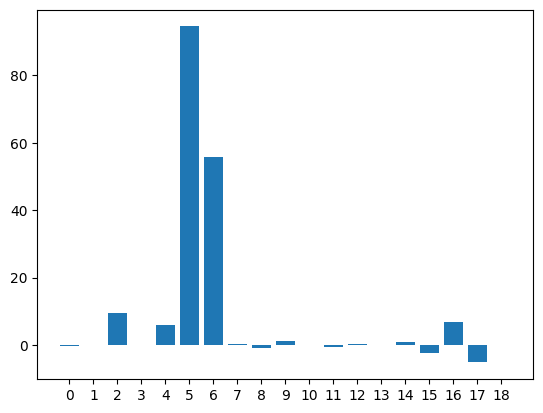

In [222]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import csv

# read data from traceroute
reader = csv.reader(traceroute_output.splitlines(), delimiter=' ', skipinitialspace=True)

# begin insert code
# calculate rrts
rtts = [[float(y) for y in x[1:] if y != "ms" and y != "*"] for x in reader]
# filter empty lines
rtts = [r for r in rtts if len(r)]
# calculate rrt-deltas
deltas = np.zeros(len(rtts) - 1)

for i in range(len(deltas)):
    deltas[i] = np.average(rtts[i + 1]) - np.average(rtts[i])

plt.bar(np.arange(len(deltas)), deltas)
plt.xticks(np.arange(len(deltas)));
# end insert code

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>f) [0.25 credits]</b>
Try to find an explanation for the largest RTT difference calculated in the previous subproblem.
</p>
</div>

When looking at the ip addresses of the different hops that cause the largest deltas, using a geo location tool (in our case I was using https://www.iplocation.net/ip-lookup), we can see that the largest deltas happen between hops to servers in the netherlands and hops to servers in Illinois, US. This makes sense as this hope has to travel a really large distance.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>g) [0.5 credits]</b>
Explain why the RTT differences should be always positive in theory. 
Why does this assumption not always hold in practice?</p>
</div>

For each hop, the distance the packet has to travel increases. This means as we are getting further along the path, the RTT of each packet should increase as well. In reality, this is not always the case as we are sending a new packet for each hop with an increase TTL. The packet could take a different path or the RTT could be affected by other influences, for example a router being busy and causing some delay before responding. Because of those delays, it might happen that the RTT difference is negative in some occurences.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>h) [0.5 credits]</b>
Try to find out different ways to determine the approximate geographical location of the hops in the given traceroute.
</p>
</div>

As we already saw in task f), we can use ip geo lookup to get the location (for example using https://www.iplocation.net/ip-lookup). Another method is looking at the domain of the hop, as it sometimes hints the geographical location (e.g. dfn.mx1.fra.**de**.geant.net for germany and ae7.mx1.ams.**nl**.geant.net for netherlands). Additionally, there are direct lookup tools for IPv6 addresses (for example http://www.ipgp.net/ipv6-address-locator/).

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p>
<b>i) [1 credit]</b>
    Figure out the approximate location for as many hops as possible. Use at least <b>two</b> different methods to determine the location
</p>
</div>

* #1 Germany (http://www.ipgp.net/ipv6-address-locator/)
* #2 Germany (http://www.ipgp.net/ipv6-address-locator/)
* #3 Germany (http://www.ipgp.net/ipv6-address-locator/)
* #4
* #5 Germany (http://www.ipgp.net/ipv6-address-locator/)
* #6 Netherlands (http://www.ipgp.net/ipv6-address-locator/)
* #7 Netherlands (http://www.ipgp.net/ipv6-address-locator/)
* #8 Netherlands (http://www.ipgp.net/ipv6-address-locator/)
* #9 United States (http://www.ipgp.net/ipv6-address-locator/)
* #10 United States (http://www.ipgp.net/ipv6-address-locator/)
* #11 United States (http://www.ipgp.net/ipv6-address-locator/)
* #12 United States (http://www.ipgp.net/ipv6-address-locator/)
* #13 United States (http://www.ipgp.net/ipv6-address-locator/)
* #14 United States (http://www.ipgp.net/ipv6-address-locator/)
* #15 United States (http://www.ipgp.net/ipv6-address-locator/)
* #16 United States (http://www.ipgp.net/ipv6-address-locator/)
* #17 United States (http://www.ipgp.net/ipv6-address-locator/)
* #18 United States (http://www.ipgp.net/ipv6-address-locator/)
* #19 United States (http://www.ipgp.net/ipv6-address-locator/)
* #20
* #21 United States (http://www.ipgp.net/ipv6-address-locator/)
* #22 United States (http://www.ipgp.net/ipv6-address-locator/)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<p><b>Advanced Computer Networking by Prof. Dr.-Ing. Georg Carle</b></p>
<p>Teaching assistants: Sebastian Gallenmüller, Benedikt Jaeger, Max Helm, Patrick Sattler, Johannes Zirngibl</p>
</div>